In [76]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "winequality-red.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/red-wine-quality-cortez-et-al-2009",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
df.head(2)

/tmp/ipython-input-1534932351.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 98.6k/98.6k [00:00<00:00, 576kB/s]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [78]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [79]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [80]:
corr=df.corr()

corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


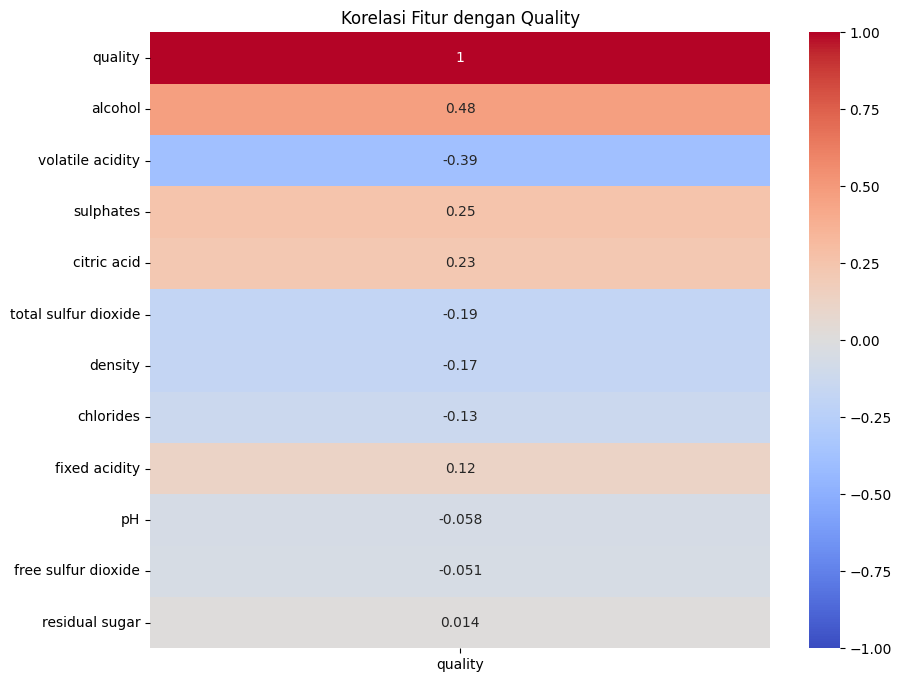

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap fokus pada korelasi dengan quality
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr[['quality']].sort_values('quality', key=abs, ascending=False),
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1
)
plt.title("Korelasi Fitur dengan Quality")
plt.show()

In [82]:
# df['alcohol_to_volatile_acidity'] = df['alcohol'] / (df['volatile acidity'] + 1e-6)  # tambah epsilon agar tidak dibagi 0

# # Rasio asam sitrat terhadap total asam (fixed acidity)
# df['citric_to_fixed_acid'] = df['citric acid'] / (df['fixed acidity'] + 1e-6)

# # Total sulfur dioxide per liter (jika density digunakan sebagai proxy volume)
# df['sulfur_per_density'] = df['total sulfur dioxide'] * df['density']

In [83]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [84]:
# df['alcohol_category'] = pd.cut(
#     df['alcohol'],
#     bins=[0, 9, 10.5, 12, 15],
#     labels=['low', 'medium', 'high', 'very_high']
# )

# # Encode menjadi numerik
# df['alcohol_category_encoded'] = df['alcohol_category'].cat.codes

In [85]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
# df['alcohol_squared'] = df['alcohol'] ** 2
# df['pH_sqrt'] = np.sqrt(df['pH'])

In [87]:
# df['log_residual_sugar'] = np.log(df['residual sugar'] + 1)  

In [88]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [89]:
# # Definisikan urutan kategori dari rendah ke tinggi
# category_order = ['low', 'medium', 'high', 'very_high']

# # Buat mapping
# mapping = {cat: idx for idx, cat in enumerate(category_order)}
# print("Mapping:", mapping)
# # Output: {'low': 0, 'medium': 1, 'high': 2, 'very_high': 3}

# # Terapkan ke kolom
# df['alcohol_category_encoded'] = df['alcohol_category'].map(mapping)

In [90]:
df = df.drop(columns=['alcohol_category']) 

KeyError: "['alcohol_category'] not found in axis"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Siapkan data
Y = df['quality']
X = df.drop(columns=['quality'])  # hapus kolom string

# Split data (stratify karena multikelas)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [ ]:
# 1. Logistic Regression
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# 2. KNN
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

# 3. Gaussian Naive Bayes
pipe_nb = Pipeline([
    ('scaler', StandardScaler()),  # opsional untuk NB, tapi konsisten
    ('clf', GaussianNB())
])

# Latih semua model
models = {
    'Logistic Regression': pipe_lr,
    'KNN': pipe_knn,
    'GaussianNB': pipe_nb
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    trained_models[name] = model

In [ ]:
# Simpan hasil
results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    results[name] = {
        'accuracy': acc,
        'predictions': y_pred,
        'report': classification_report(Y_test, y_pred, output_dict=True)
    }
    print(f"\n=== {name} ===")
    print(f"Akurasi: {acc:.4f}")
    print(classification_report(Y_test, y_pred))


=== Logistic Regression ===
Akurasi: 0.5938
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.63      0.71      0.67       136
           6       0.54      0.62      0.58       128
           7       0.74      0.35      0.47        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.32      0.28      0.29       320
weighted avg       0.58      0.59      0.57       320


=== KNN ===
Akurasi: 0.5938
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.09      0.13        11
           5       0.65      0.71      0.68       136
           6       0.55      0.59      0.57       128
           7       0.58      0.45      0.51        40
           8       0.00      0.00      0.00         3

   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

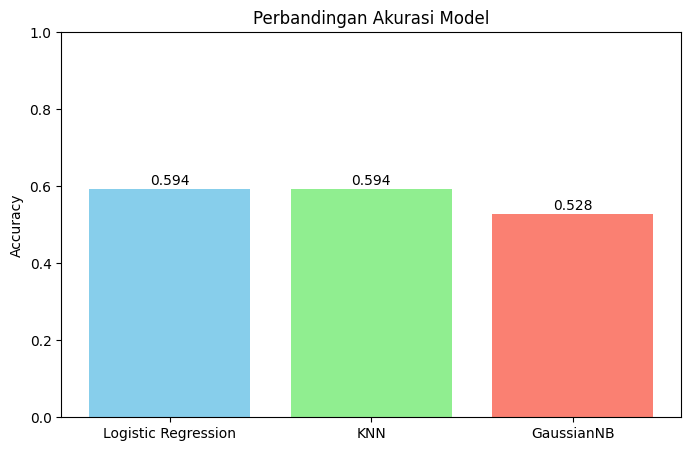

In [ ]:
names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in names]

plt.figure(figsize=(8, 5))
bars = plt.bar(names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.3f}', ha='center')
plt.show()